# Практическая работа №4
## Расчет индексов термичесокого комфорта в Python 

In [20]:
import pandas as pd
import numpy as np

import biometeo
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


#### Чтение данных из текстового файла (подготовленного для RayMan), задание времени 

In [4]:
data_df = pd.read_table ('PW4_data\Moscow_VDNKh_2010.txt', names = ['date', 'hour', 'lon', 'lat', 'elev', 'ta', 'rh', 'vel', 'tcc', 'ts'])
data_df['UTC time'] = [pd.to_datetime (date + ' ' + str (hour), format='%d.%m.%Y %H') for date,hour in zip(data_df['date'], data_df['hour'])]
data_df['MSK time'] = data_df['UTC time'] + pd.Timedelta(hours=3)

data_df = data_df.set_index('UTC time').drop(columns = ['date', 'hour'])
display(data_df.head())




,lon,lat,elev,ta,rh,vel,tcc,ts,MSK time
UTC time,,,,,,,,,
2010-01-01 00:00:00,37.62,55.83,148,-6.0,91.9,0.4,8.0,-6.3,2010-01-01 03:00:00
2010-01-01 03:00:00,37.62,55.83,148,-9.2,91.6,0.4,8.0,-10.5,2010-01-01 06:00:00
2010-01-01 06:00:00,37.62,55.83,148,-11.5,90.0,0.4,7.2,-15.4,2010-01-01 09:00:00
2010-01-01 09:00:00,37.62,55.83,148,-10.1,85.1,0.7,6.4,-10.2,2010-01-01 12:00:00
2010-01-01 12:00:00,37.62,55.83,148,-8.9,82.6,0.7,5.6,-10.2,2010-01-01 15:00:00


#### Расчет MRT и индексов термического комфорта с помощью библиотеки [biometeo](https://pypi.org/project/biometeo/)

In [16]:
results = []
for i in range(0,len(data_df['ta'])):
    res = biometeo.Tmrt_calc (Ta=data_df['ta'][i], RH=data_df['rh'][i], v=data_df['vel'][i], N = data_df['tcc'][i], 
                               longitude=data_df['lon'][i], latitude=data_df['lat'][i], sea_level_height=data_df['elev'][i],
                               day_of_year = data_df.index[i].dayofyear, hour_of_day = np.mod(data_df.index[i].hour + data_df['lon'][i]/15, 24))
    res['UTC time'] = data_df.index[i]
    res['MSK time'] = data_df['MSK time'][i]
    
    res['PET'] = biometeo.PET(Ta = data_df['ta'][i], VP = biometeo.VP_RH_exchange(Ta = data_df['ta'][i], RH=data_df['rh'][i])['VP'], 
                              v = data_df['vel'][i], Tmrt = res['Tmrt'])['PET_v']
    
    res['UTCI'] = biometeo.UTCI(Ta = data_df['ta'][i], VP = biometeo.VP_RH_exchange(Ta = data_df['ta'][i], RH=data_df['rh'][i])['VP'], 
                                v = data_df['vel'][i], Tmrt = res['Tmrt'])
    results.append(res)

results_df = pd.concat ((pd.DataFrame.from_dict (results).set_index('MSK time'), data_df), axis=1)



#### Построение графиков

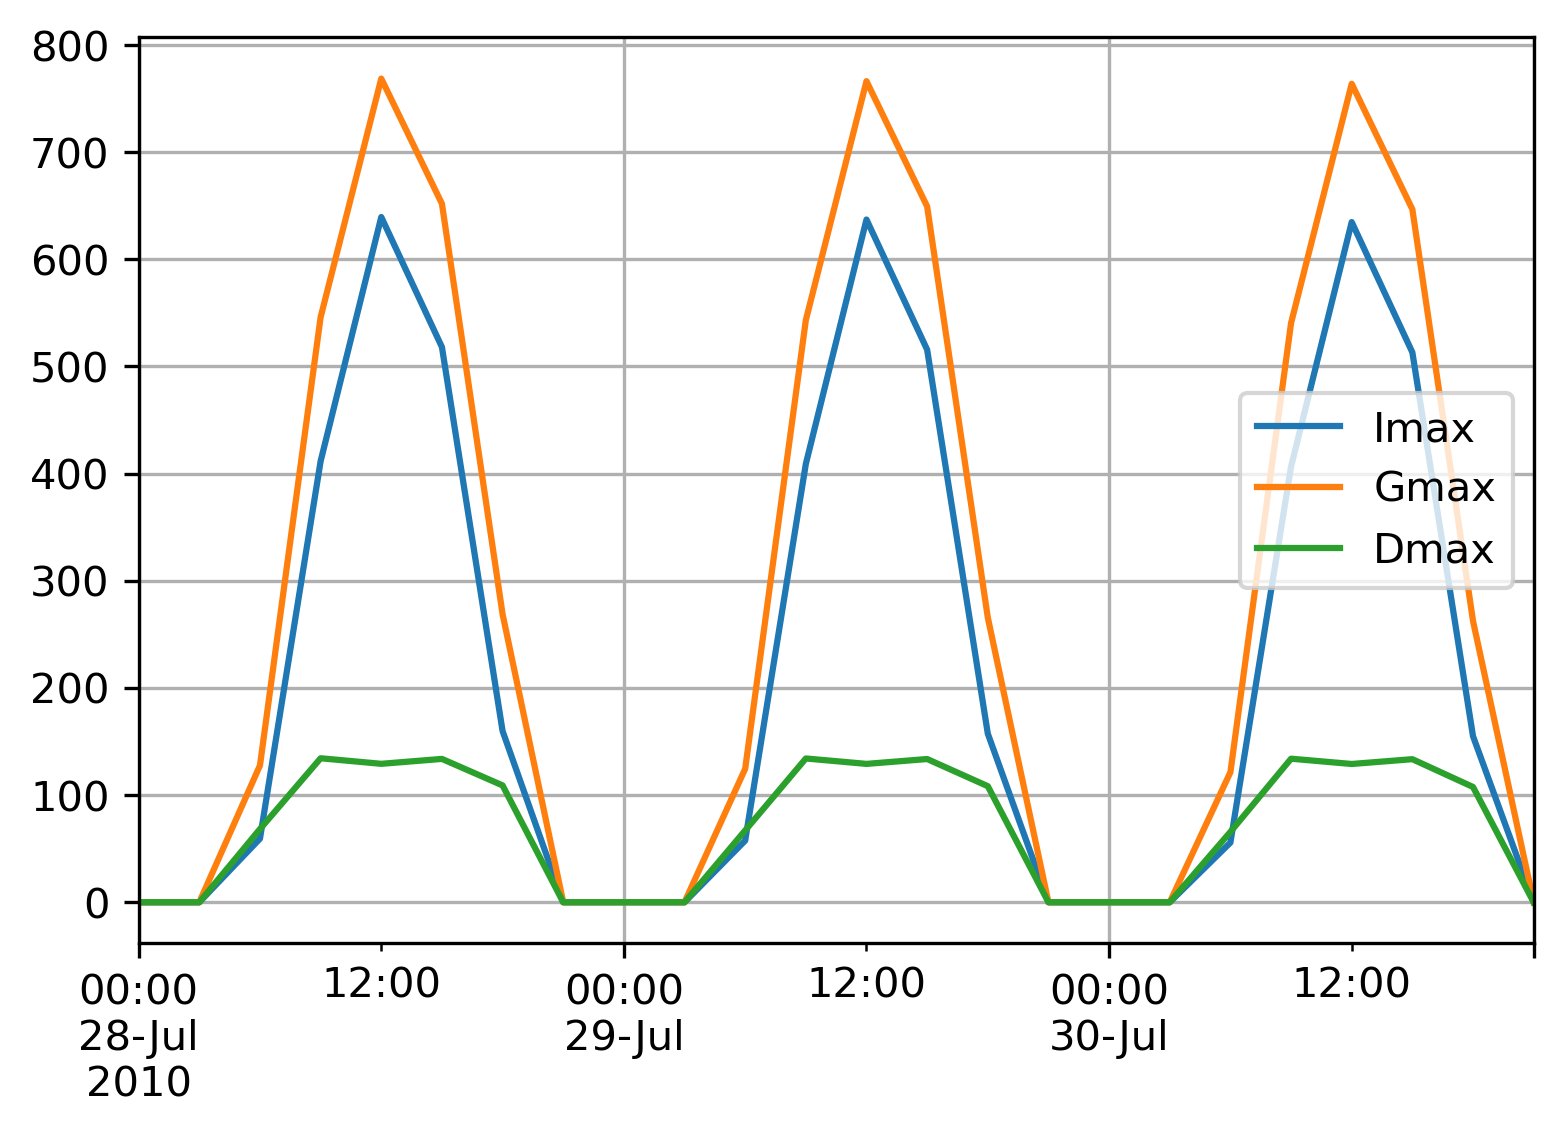

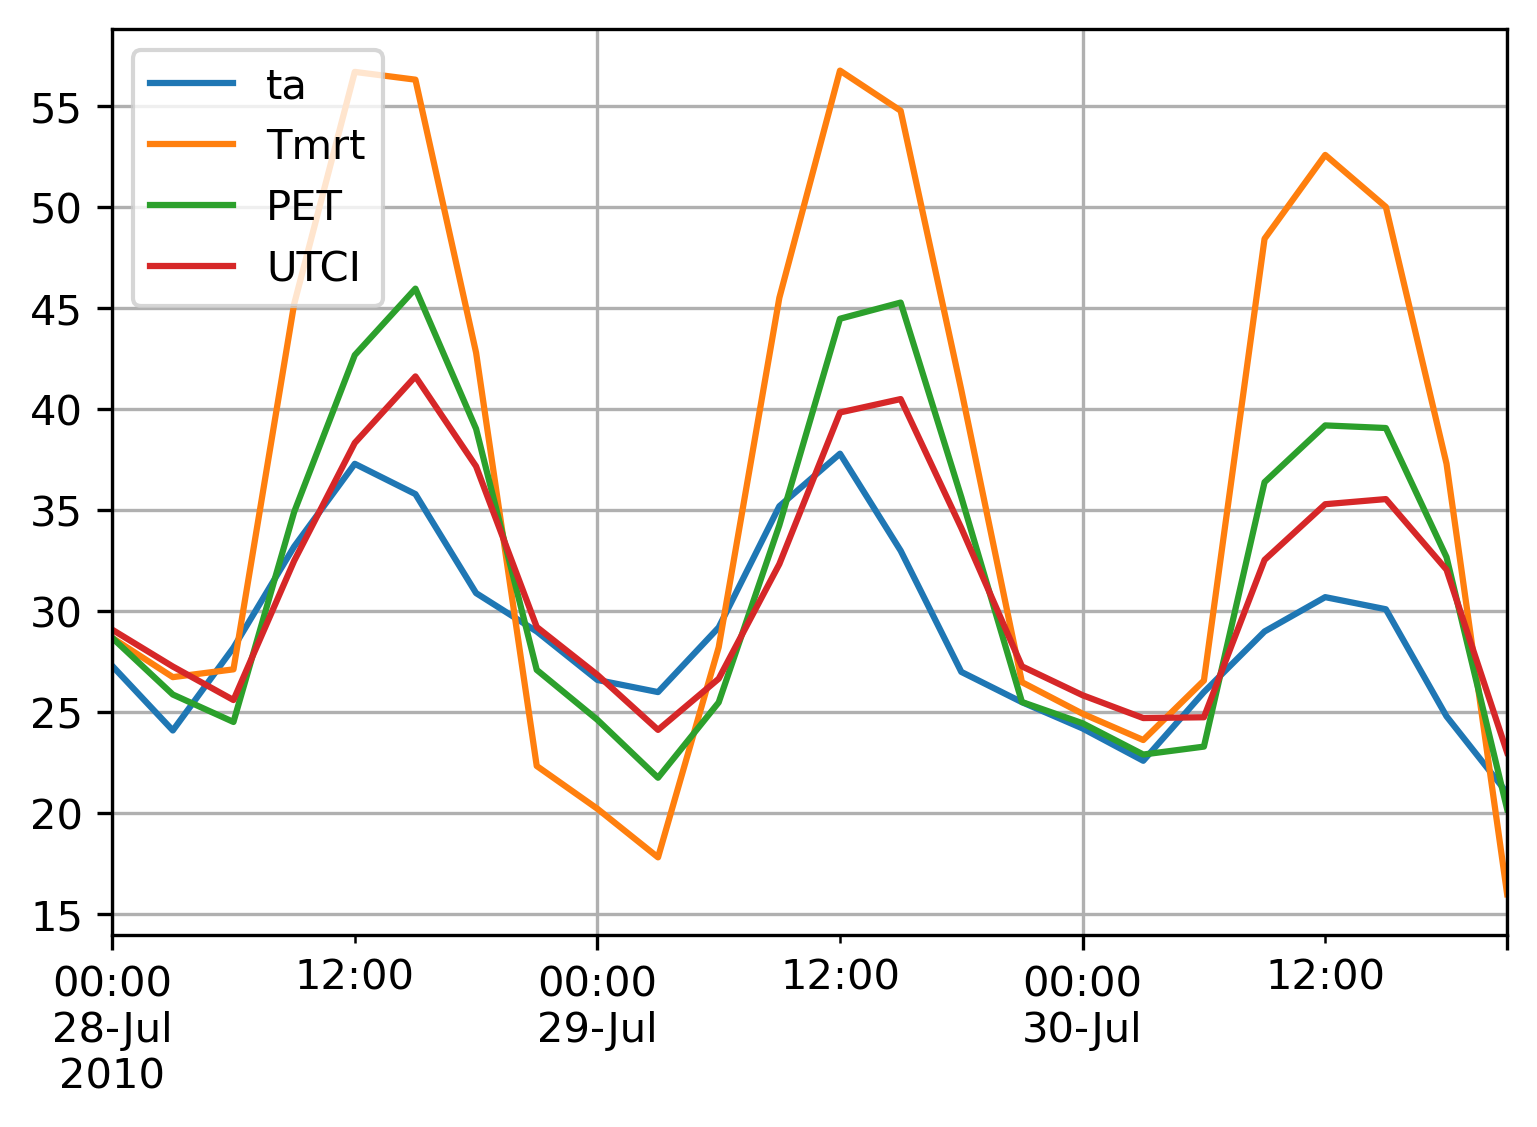

In [21]:

df2draw = results_df['2010-07-28':'2010-07-30']


plt.figure()
df2draw['Imax'].plot()
df2draw['Gmax'].plot()
df2draw['Dmax'].plot()
plt.grid()
plt.legend()

plt.figure()
df2draw['ta'].plot()
df2draw['Tmrt'].plot()
df2draw['PET'].plot()
df2draw['UTCI'].plot()

plt.grid()
plt.legend()

